In [1]:
%matplotlib inline
from qcodes.dataset.experiment_container import new_experiment
from qcodes.dataset.experiment_container import load_by_id
from qcodes.dataset.plotting import plot_by_id

import nanotune as nt
from nanotune.model.capacitancemodel import CapacitanceModel

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jana/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jana/.qcodes/logs/210816-14863-qcodes.log


## Capacitance model for a single dot


Initiate or set database where data should be saved. When initializing a database a new qcodes experiment needs to be created as well.

In [2]:
exp_name = 'capacitance_extraction'
sample_name = 'capa_model'
db_name = 'capa_model_test.db'
nt.new_database(db_name, '.')
new_experiment(exp_name, sample_name)

capacitance_extraction#capa_model#2@/Users/jana/Documents/code/nanotune/nanotune/docs/examples/capa_model_test.db
-----------------------------------------------------------------------------------------------------------------

Initialize an instance of CapacitanceModel with three gates and one dot

In [3]:
voltage_nodes = {
    0: 'left_barrier',
    1: 'plunger',
    2: 'right_barrier',
}
charge_nodes = {
    0: 'A',
}

qdot = CapacitanceModel(
    'qdot',
    charge_nodes=charge_nodes,
    voltage_nodes=voltage_nodes,
    db_name=db_name,
    db_folder='.'
)


Set voltages, define capacitance matrix and calculate the corresponding ground state dot occupation. Negative electron occupations are not allowed, they are replaces with zero.

In [4]:
qdot.V_v([
    -1.55, # left_barrier
    1,     # plunger
    -3.5,  # right_barrier
])

# capacitances between gates and dots  
qdot.C_cv(
# left_b  plunger right_b
    [[-0.1, -1.3, -2]],  
)
print(qdot.determine_N())

[0.0]


Determine the voltage range required to sweep in order to measure specific charge states (dot occupancies)

In [5]:
N_limits = [(0, 2)]
sweep_ranges = qdot.determine_sweep_voltages([1], N_limits=N_limits)
print(sweep_ranges)

[(array([5.50380859]),), (array([7.04228165]),)]


Starting experimental run with id: 1. 


([<AxesSubplot:title={'center':'Run #1, Experiment capacitance_extraction (capa_model)'}, xlabel='voltage node plunger (V[1]) (V)', ylabel='Gate R (V)'>],
 [None])

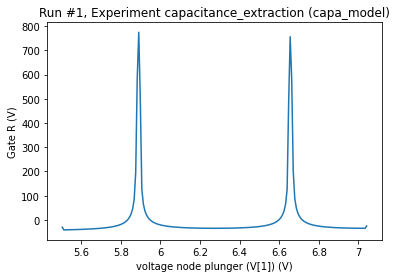

In [6]:
dataid = qdot.sweep_voltage(
    1, 
    sweep_ranges,
    n_steps=200,
    normalize=False,
)
plot_by_id(dataid)

Let's change the voltage configuration to see what happens to the Coulomb peaks

Starting experimental run with id: 2. 


([<AxesSubplot:title={'center':'Run #2, Experiment capacitance_extraction (capa_model)'}, xlabel='voltage node plunger (V[1]) (V)', ylabel='Gate R (V)'>],
 [None])

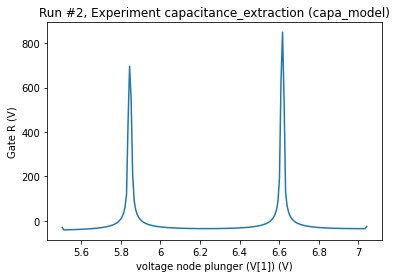

In [7]:
qdot.V_v([
    -1,  # left_barrier
    1,  # plunger
    -3.5,  # right_barrier
])
dataid = qdot.sweep_voltage(
    1, 
    sweep_ranges,
    n_steps=200,
    normalize=False,
)
plot_by_id(dataid)
